# Importing libraries 

In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
from ultralytics import YOLO
import time 
import os 

# Cars Detection 

In [2]:
import cv2

frameWidth = 300
frameHeight = 300
numberPlate = cv2.CascadeClassifier("../../Models/haarcascade_russian_plate_number.xml")
minArea  = 200
color = (255,0,255)

cap = cv2.VideoCapture(0)
cap.set(3,frameWidth)
cap.set(4, frameHeight)
cap.set(10,150)
count = 0


while True:
    success, img = cap.read()
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    numberPlates = numberPlate.detectMultiScale(imgGray,1.1 , 10)

    for (x, y, w, h) in numberPlates:
        area = w*h
        if area > minArea:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,255), 2)
            cv2.putText(img, "number plate",(x,y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1,color,2)
            imgRoi = img[y:y+h, x:x+w]
            cv2.imshow("Roi", imgRoi)
    cv2.imshow("img", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
    if cv2.waitKey(1) & 0xFF == ord('s'):
        cv2.imwrite("Ressources/Result/Noplate_"+str(count)+".jpg", imgRoi)
        cv2.rectangle(img, (0,200), (640, 265), (0,0,255), cv2.FILLED)
        cv2.putText(img, "scan saved", (150,265), cv2.FONT_HERSHEY_DUPLEX,2,(0,0,255), 2)
        cv2.imshow("Result", img)
        cv2.waitKey(500)
        count +=1



KeyboardInterrupt: 

### Video

In [ ]:
import cv2
from ultralytics import YOLO
import cv2

frameWidth = 300
frameHeight = 300
model_path = "../../Models/yolov8n.pt"  # Replace with your custom model path
model = YOLO(model_path)
numberPlate = cv2.CascadeClassifier("../../Models/haarcascade_russian_plate_number.xml")
minArea  = 200
color = (255,0,255)



cap = cv2.VideoCapture(0)
cap.set(3,frameWidth)
cap.set(4, frameHeight)
cap.set(10,150)
count = 0


if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    success, img = cap.read()
    if not success:
        print("Error: Failed to capture image.")
        break

    # Convert to grayscale for Haar Cascade
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    numberPlates = numberPlate.detectMultiScale(imgGray, 1.1, 10)

    # Run YOLO detection
    results = model(img)

    # Draw YOLO results
    for box in results[0].boxes:
        # Extract bounding box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0]  # Confidence score
        cls = int(box.cls[0])  # Class ID
        if cls == 2 :
            # Annotate the image with bounding box and label
            label = f"car {cls}: {conf:.2f}"
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
            plale = model(img)
            for xbox in plate[0].boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                conf = box.conf[0]  # Confidence score
                cls = int(box.cls[0])  # Class ID
                if cls == 1:
                    # Annotate the image with bounding box and label
                    label = f"plate {cls}: {conf:.2f}"
                    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
                    imgRoi = img[x1:x2, y1:y2]
                    cv2.imshow("Roi", imgRoi)
    # Display the annotated image
    cv2.imshow("YOLO Results", img)

    # Exit loop on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


# Image

In [25]:
import cv2
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


numberPlate = cv2.CascadeClassifier("../../Models/haarcascade_russian_plate_number.xml")
def detectCars(img):
    model_path = "../../Models/yolov8n.pt"  
    model = YOLO(model_path)
    # Run YOLO detection
    results = model(img)
    car_image = None
    labels = {2:"car", 7:"truck",5:"bus"}
    # Draw YOLO results
    for box in results[0].boxes:
        # Extract bounding box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0]  # Confidence score
        cls = int(box.cls[0])  # Class ID
        if cls == 2 or cls ==  7:
            # Annotate the image with bounding box and label
            label = f"{labels[cls]}: {conf:.2f}"
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
            car_image = img[y1:y2,x1:x2]

    return img, car_image
def getPlateImg(img):
    model_path = "../../Models/license_plate_detector.pt"  
    model = YOLO(model_path)
    # Run YOLO detection
    results = model(img)
    plate_image = None
    # Draw YOLO results
    for box in results[0].boxes:
        # Extract bounding box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0]  # Confidence score
        cls = int(box.cls[0])  # Class ID
        
        label = f"plate {cls}: {conf:.2f}"
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        plate_image = img[y1:y2, x1:x2]

    return img, plate_image


0: 640x640 1 car, 157.4ms
Speed: 16.1ms preprocess, 157.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x576 1 license_plate, 187.4ms
Speed: 8.1ms preprocess, 187.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 576)


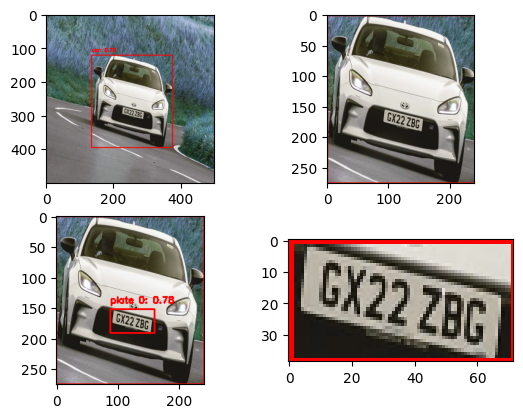

In [26]:
img = cv2.imread("../../Images/test.jpg")
img = cv2.resize(img, (500,500))
imgO, car = detectCars(img)
plt.subplot(2,2,1)
plt.imshow(imgO)
plt.subplot(2,2,2)
plt.imshow(car)

imgC, plate_image = getPlateImg(car)

plt.subplot(2,2,3)
plt.imshow(imgC)

plt.subplot(2,2,4)
plt.imshow(plate_image)

In [ ]:
import cv2
from ultralytics import YOLO
import cv2

frameWidth = 300
frameHeight = 300
model_path = "../../Models/yolov8n.pt"  # Replace with your custom model path




cap = cv2.VideoCapture(0)
cap.set(3,frameWidth)
cap.set(4, frameHeight)
cap.set(10,150)
count = 0


if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    success, img = cap.read()
    if not success:
        print("Error: Failed to capture image.")
        break

    img = cv2.resize(img, (500,500))
    imgO, car = detectCars(img)
    plt.subplot(2,2,1)
    cv2.imshow("imgO",imgO)
    imgC = None
    if car is not None:
        plt.subplot(2,2,2)
        cv2.imshow("car",car)

        imgC, plate_image = getPlateImg(car)
    if imgC is not None:
        plt.subplot(2,2,3)
        cv2.imshow("imgC",imgC)

        plt.subplot(2,2,4)
        cv2.imshow("plate",plate_image)

    if  0xFF == ord("q"):
        break




0: 640x640 1 person, 142.8ms
Speed: 16.0ms preprocess, 142.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 159.0ms
Speed: 8.0ms preprocess, 159.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 137.2ms
Speed: 8.0ms preprocess, 137.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 120.8ms
Speed: 8.0ms preprocess, 120.8ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 128.8ms
Speed: 0.0ms preprocess, 128.8ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 147.1ms
Speed: 8.0ms preprocess, 147.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 127.4ms
Speed: 8.0ms preprocess, 127.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 119.0ms
Speed: 8.0ms preprocess, 119.0ms inference, 0.0ms postprocess per image a


0: 640x640 1 person, 113.3ms
Speed: 10.2ms preprocess, 113.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 118.7ms
Speed: 8.0ms preprocess, 118.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 112.7ms
Speed: 8.0ms preprocess, 112.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 117.4ms
Speed: 8.0ms preprocess, 117.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 112.9ms
Speed: 8.0ms preprocess, 112.9ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 109.3ms
Speed: 8.0ms preprocess, 109.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 119.7ms
Speed: 10.2ms preprocess, 119.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 117.4ms
Speed: 8.0ms preprocess, 117.4ms inference, 0.0ms postprocess per image 

# OCR from scratch 

# Convert plate image to gray scale image

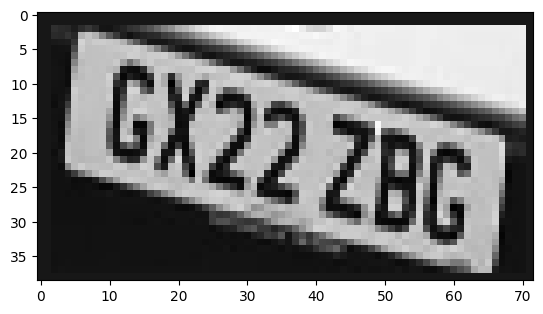

In [4]:
import cv2
gray_plate = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_plate, cmap="gray")

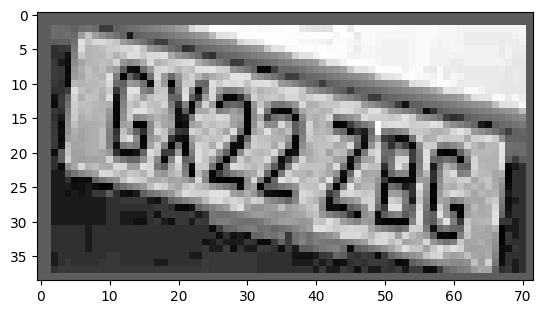

In [5]:
gray_plate = cv2.equalizeHist(gray_plate)
plt.imshow(gray_plate, cmap="gray")

# Binarize the image 

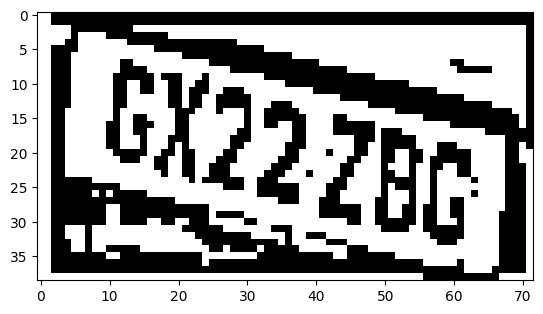

In [6]:
binary_plate = cv2.adaptiveThreshold(
    gray_plate, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)
plt.imshow(binary_plate, cmap="gray")

# Resize the image 

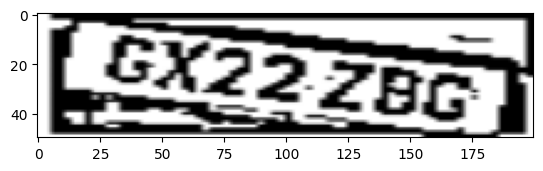

In [7]:
resized_plate = cv2.resize(binary_plate, (200, 50)) 
plt.imshow(resized_plate, cmap="gray")

In [8]:
contours, _ = cv2.findContours(
    resized_plate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)


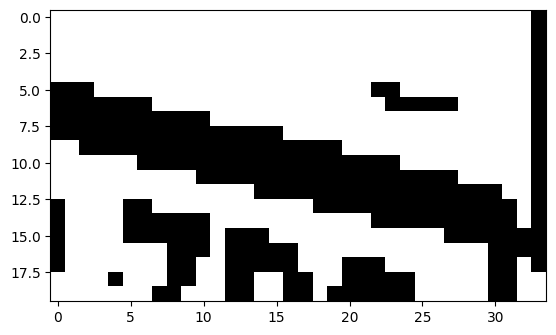

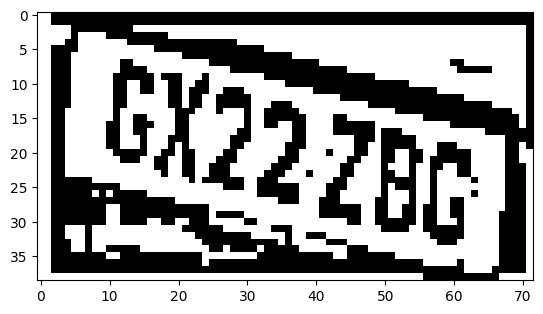

In [9]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w > 15:  
        char = binary_plate[y:y+h, x:x+w]
        plt.imshow(char, cmap="gray")
        plt.show()

# Image segmentation and character extraction

## This is a big a problem you will face if you are beginner 

In [10]:
import easyocr
import os

# Avoid Intel MKL threading conflict (use for debugging purposes only)
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

C:\Users\Hassan Kerroumi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [16]:
reader = easyocr.Reader(["en"])
result = reader.readtext(resized_image)
result[0]

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


NameError: name 'resized_image' is not defined

In [17]:
result[1]

([[4.105175020592159, -2.863439934105089],
  [46.92539856737438, 10.335136689233096],
  [38.894824979407844, 34.86343993410509],
  [-2.9253985673743794, 21.664863310766904]],
 '[X222',
 0.035825291991965574)

# OCR read a plate content 

In [28]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd

# Virsualization for data 
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

# import Callbacks for EarlySttoping
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# important laibary for bulding Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPooling2D, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 
from sklearn.utils import shuffle
from keras.utils import to_categorical

# Data Augmentation (THis is bonus :)  )
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\Hassan Kerroumi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [29]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = np.expand_dims(X_train, -1 )
X_test = np.expand_dims(X_test, -1)
y_train = np.expand_dims(y_train, -1 )
y_test = np.expand_dims(y_test, -1)
X_test.shape, X_train.shape

((10000, 28, 28, 1), (60000, 28, 28, 1))

# Load arabic character dataset

In [30]:
#SPlit our data into 4 parts (x_train,x_test,y_train,y_test)
Xtrain=pd.read_csv('C:/Users/Hassan Kerroumi/Computer_Vision/Projet/Arabic/csvTrainImages 13440x1024.csv').to_numpy()
Xtest=pd.read_csv('C:/Users/Hassan Kerroumi/Computer_Vision/Projet/Arabic/csvTestImages 3360x1024.csv').to_numpy()
ytrain=pd.read_csv('C:/Users/Hassan Kerroumi/Computer_Vision/Projet/Arabic/csvTrainLabel 13440x1.csv').to_numpy()-1
ytest=pd.read_csv('C:/Users/Hassan Kerroumi/Computer_Vision/Projet/Arabic/csvTestLabel 3360x1.csv').to_numpy()-1

In [31]:
# printing the Shape of data to show no rows,columns 
print('X_train shape is ',Xtrain.shape)
print('X_test shape is ',Xtest.shape)
print('y_train shape is ',ytrain.shape)
print('y_test shape is ',ytest.shape)

X_train shape is  (13439, 1024)
X_test shape is  (3359, 1024)
y_train shape is  (13439, 1)
y_test shape is  (3359, 1)


In [32]:
# We Need to do Reshape our Data 
Xtrain = Xtrain.reshape(-1,32,32,1)
Xtest = Xtest.reshape(-1,32,32,1)

In [33]:
ytrain, ytest  = ytrain+10, ytest+10

In [34]:
# printing the Shape of data to show no rows,columns after Reshape
print('X_train shape is ',Xtrain.shape)
print('X_test shape is ',Xtest.shape)
print('y_train shape is ',ytrain.shape)
print('y_test shape is ',ytest.shape)

X_train shape is  (13439, 32, 32, 1)
X_test shape is  (3359, 32, 32, 1)
y_train shape is  (13439, 1)
y_test shape is  (3359, 1)


In [35]:
Xtrain = tf.image.resize(Xtrain, (28, 28))
Xtest = tf.image.resize(Xtest, (28, 28))

In [36]:
# printing the Shape of data to show no rows,columns after Reshape
print('X_train shape is ',Xtrain.shape)
print('X_test shape is ',Xtest.shape)
print('y_train shape is ',ytrain.shape)
print('y_test shape is ',ytest.shape)

X_train shape is  (13439, 28, 28, 1)
X_test shape is  (3359, 28, 28, 1)
y_train shape is  (13439, 1)
y_test shape is  (3359, 1)


# Load english character dataset

In [37]:
from imutils import paths
def load_dataset(path, classes_name):
    """ 
  It reads the images in the directory and creates their labels.

  Parameters:

  path: Refers to the directory where the images are located.
  Return:
   x: It stores the matrix information of the images.
  labels: A list that holds the class information of each image.
  """
    x = []
    labels = []
    # It lists and sorts the images in the specified path
    image_paths = sorted(list(paths.list_images(path)))
   
    for image_path in image_paths :
        # The images in the specified path are read using the OpenCV library
        img = cv2.imread(image_path)
        # resize the read image 
        img = cv2.resize(img, target_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # the resized images are added to the x list
        x.append(img)
         # When each path is split by '/', the second-to-last element of the resulting list represents the label
        label = image_path.split(os.path.sep)[-2]
        
        # The label is created by retrieving the corresponding value for the given key from the `waste_labels`

        # dictionary, which contains the numerical representations of the captured labels
        labels.append(classes_name[label])
        # the dataset is shuffled randomly
    x, labels = shuffle(x, labels, random_state = 42)
    print(f'X size : {np.array(x).shape}')
    print(f'Number of label classes {np.unique(labels)}, Number of observation in the dataset : {len(labels)}')
    
    return np.array(x), np.array(labels) 


In [38]:
classes_name = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
    'A': 39, 'B': 40, 'C': 41, 'D': 42, 'E': 43, 'F': 44, 'G': 45, 'H': 46, 'I': 47, 'J': 48,
    'K': 49, 'L': 50, 'M': 51, 'N': 52, 'O': 53, 'P': 54, 'Q': 55, 'R': 56, 'S': 57, 'T': 58,
    'U': 59, 'V': 60, 'W': 61, 'X': 62, 'Y': 63, 'Z': 64,
    'unknown': -1 
}
target_size = (28,28)
path1 = "C:/Users/Hassan Kerroumi/Computer_Vision/Projet/English/data/training_data"
path2 = "C:/Users/Hassan Kerroumi/Computer_Vision/Projet/English/data/testing_data"
path3 = "C:/Users/Hassan Kerroumi/Computer_Vision/Projet/English/data2/training_data"
path4 = "C:/Users/Hassan Kerroumi/Computer_Vision/Projet/English/data2/testing_data"

In [39]:
x1, labels1 = load_dataset(path1, classes_name)
x2, labels2 = load_dataset(path2, classes_name)
x3, labels3 = load_dataset(path3, classes_name)


X size : (20628, 28, 28)
Number of label classes [ 0  1  2  3  4  5  6  7  8  9 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64], Number of observation in the dataset : 20628
X size : (1008, 28, 28)
Number of label classes [ 0  1  2  3  4  5  6  7  8  9 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64], Number of observation in the dataset : 1008
X size : (20628, 28, 28)
Number of label classes [ 0  1  2  3  4  5  6  7  8  9 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64], Number of observation in the dataset : 20628


In [40]:
x4, labels4 = load_dataset(path4, classes_name)

X size : (3241, 28, 28)
Number of label classes [ 0  1  2  3  4  5  6  7  8  9 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64], Number of observation in the dataset : 3241


# Expand dimensions

In [41]:
x1 = np.expand_dims(x1, -1)
x2 = np.expand_dims(x2, -1)
x3 = np.expand_dims(x3, -1)
x4 = np.expand_dims(x4, -1)
labels1 = np.expand_dims(labels1, -1)
labels2 = np.expand_dims(labels2, -1)
labels3 = np.expand_dims(labels3, -1)
labels4 = np.expand_dims(labels4, -1)

# Print shapes 

In [42]:
print("path1 ", x1.shape, labels1.shape)
print("path2 ", x2.shape, labels2.shape)
print("path3 ", x3.shape, labels3.shape)
print("path4 ", x4.shape, labels4.shape)

path1  (20628, 28, 28, 1) (20628, 1)
path2  (1008, 28, 28, 1) (1008, 1)
path3  (20628, 28, 28, 1) (20628, 1)
path4  (3241, 28, 28, 1) (3241, 1)


# Concatenate all data 

In [43]:
y_train.shape, y_test.shape

((60000, 1), (10000, 1))

In [71]:
all_xtrain = np.concatenate([X_train, Xtrain, x1, x3], axis = 0) / 255.0
all_xtest = np.concatenate([X_test, Xtest, x2, x4], axis = 0) / 255.0
all_ytrain = np.concatenate([y_train, ytrain, labels1, labels3], axis = 0)
all_ytest = np.concatenate([y_test, ytest, labels2, labels4], axis = 0)


# Split data to validation and test

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
all_xtest, X_val, all_ytest, y_val = train_test_split(all_xtest, all_ytest, test_size = 0.5, random_state = 42)

In [74]:
all_xtrain.shape

(114695, 28, 28, 1)

# Create a model 

In [75]:
NN_model = Sequential([
    # Layer 1
    Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same', 
           activation='relu', input_shape=(28, 28, 1)),  # Output: (28, 28, 64)
    MaxPooling2D(pool_size=(2, 2)),                     # Output: (14, 14, 64)
    
    # Layer 2
    Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='same', activation='relu'),  # Output: (14, 14, 128)
    MaxPooling2D(pool_size=(2, 2)),                                                          # Output: (7, 7, 128)
    
    # Layer 3
    Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='same', activation='relu'),  # Output: (7, 7, 128)
    MaxPooling2D(pool_size=(2, 2)),                                                          # Output: (3, 3, 128)
    
    # Flatten and Fully Connected Layers
    Flatten(),                                                                              # Output: (1152)
    Dense(units=128, activation='relu'),
    Dropout(0.25),
    Dense(units=256, activation='relu'),
    Dropout(0.5),
    Dense(units=256, activation='relu'),
    Dropout(0.25),
    Dense(units=128, activation='relu'),
    Dropout(0.10),
    Dense(units=65, activation='softmax'),  # Output layer for 10 classes
])


C:\Users\Hassan Kerroumi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
NN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 65)                  │           8,385 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 509,761 (1.94 MB)

 Trainable params: 509,761 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
NN_model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

In [78]:
callbacks = [EarlyStopping(monitor='val_accuracy',

                           patience=10,

                           verbose=1,

                           mode="max"),
             



             ModelCheckpoint(filepath='Res_Model_1.keras',

                             monitor='val_accuracy',
                             mode='max',

                             save_best_only=True,

                             save_weights_only=False,

                             verbose=1)]

In [ ]:
history = NN_model.fit(all_xtrain, all_ytrain, epochs = 100,callbacks = callbacks, validation_data=(X_val, y_val) )

Epoch 1/100
3583/3585 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1884 - loss: 2.5160
Epoch 1: val_accuracy improved from -inf to 0.33780, saving model to Res_Model_1.keras
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 108s 29ms/step - accuracy: 0.1884 - loss: 2.5156 - val_accuracy: 0.3378 - val_loss: 1.7837
Epoch 2/100
3583/3585 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3958 - loss: 1.6115
Epoch 2: val_accuracy improved from 0.33780 to 0.37676, saving model to Res_Model_1.keras
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 102s 29ms/step - accuracy: 0.3958 - loss: 1.6114 - val_accuracy: 0.3768 - val_loss: 1.6123
Epoch 3/100
3584/3585 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4303 - loss: 1.4946
Epoch 3: val_accuracy improved from 0.37676 to 0.40345, saving model to Res_Model_1.keras
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 124s 35ms/step - accuracy: 0.4303 - loss: 1.4946 - val_accuracy: 0.4035 - val_loss: 1.5456
Epoch 4/100
1590/3585 ━━━━━━━━━━━━━━━━━━━━ 1:18 39ms/step - accuracy: 0.4465 - loss: 1.4400

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = NN_model.evaluate(all_xtest,  all_ytest, verbose=2)

# Test

In [ ]:
from tensorflow.keras.models import load_model
NN_model = load_model("Res_Model_1.keras")
test_loss, test_acc = NN_model.evaluate(all_xtest,  all_ytest, verbose=2)

# Make prediction

In [ ]:
pathT = "C:/Users/Hassan Kerroumi/Computer_Vision/Projet/Computer-Vision/Images/characters"
classe_name = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',  
    'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 
    'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 
    'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي',           
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',  
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',  
    'U', 'V', 'W', 'X', 'Y', 'Z',                      
    'unknown'                                          
]


In [61]:
def load_test(path):
   
    x = []
    # It lists and sorts the images in the specified path
    image_paths = sorted(list(paths.list_images(path)))
   
    for image_path in image_paths :
        # The images in the specified path are read using the OpenCV library
        img = cv2.imread(image_path)
        # resize the read image 
        img = cv2.resize(img, (28,28))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # the resized images are added to the x list
        img = np.expand_dims(img, -1)
        x.append(img)
      
    print(f'X size : {np.array(x).shape}')
    
    return np.array(x)

In [62]:
test = load_test(pathT)

X size : (7, 28, 28, 1)


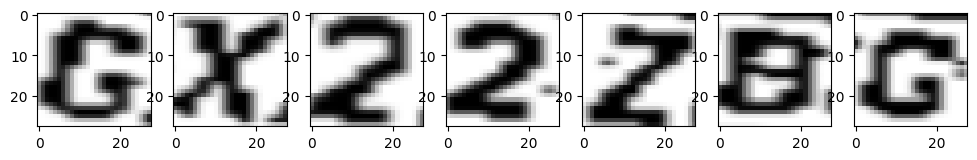

In [68]:
plt.figure(figsize=(12,12))
for i in range(7):
    plt.subplot(1,7,i+1)
    plt.imshow(test[i], cmap="gray")

In [69]:
prediction = ""
for i in range(7):
    l = []
    l.append(test[i])
    y_pred = NN_model.predict(np.array(l) / 255.0)
    predicted_class_index = np.argmax(y_pred)
    prediction += classe_name[predicted_class_index]
    print(f"Predicted class index: {predicted_class_index}")
    print(f"Predicted class name: {classe_name[predicted_class_index]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class index: 45
Predicted class name: H
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class index: 62
Predicted class name: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class index: 3
Predicted class name: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class index: 2
Predicted class name: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class index: 2
Predicted class name: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class index: 40
Predicted class name: C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class index: 43
Predicted class name: F


In [70]:
prediction

'HY322CF'